# WEB PISHING DATASET

## Importação, Análise e Pré-processamento dos Dados

### Importação

In [40]:
pip install pandas scipy numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from scipy.io import arff
import json

# Caminho para o arquivo ARFF
file_path = "./PhishingData.arff"

# Carregar os dados do arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converter para um DataFrame do pandas
df = pd.DataFrame(data)

### Análise Geral

In [23]:
#Exibir o número de linhas e colunas
print(f"Número de linhas e colunas: {df.shape}")

Número de linhas e colunas: (1353, 10)


In [24]:
#Exibir as primeiras 5 linhas do DataFrame
print("Primeiras 5 linhas:")
df.head()

Primeiras 5 linhas:


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,b'1',b'-1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'0',b'0'
1,b'-1',b'-1',b'-1',b'-1',b'-1',b'0',b'1',b'1',b'1',b'1'
2,b'1',b'-1',b'0',b'0',b'-1',b'0',b'-1',b'1',b'0',b'1'
3,b'1',b'0',b'1',b'-1',b'-1',b'0',b'1',b'1',b'0',b'0'
4,b'-1',b'-1',b'1',b'-1',b'0',b'0',b'-1',b'1',b'0',b'1'


### Explicação das Features
[Estudo sobre detecção de pishing](https://www.sciencedirect.com/science/article/pii/S0957417414001481?ref=pdf_download&fr=RR-2&rr=94043c99ede1280c)

In [65]:
data = pd.read_json("metadata/features_description.json")
df_features = pd.DataFrame(data)
df_features

,Feature,Description,-1,0,1
0,SFH,Server Form Handler (envio de informações pro ...,SFH Vazio,SHF Com outro Domínio,Qualquer outra coisa
1,SSLfinal_State,Validação do SSL (https e emissor confiável),Sem HTTPS,HTTPS Não Confiável,HTTPS Confiável
2,popUpWidnow,Uso de pop-up window para submeter credenciais,Clique Direito desabilitado,Clique Direito mostra um alerta,Qualquer outra coisa
3,Request_URL,Proporção de recursos externos carregados,Maior que 61%,Entre 22%-61%,Menor que 22%
4,URL_of_Anchor,Proporção de links âncora externos,Maior que 67%,Entre 31%-67%,Menor que 31%
5,web_traffic,Tráfego do site (AlexaDataBase Rank),Sem tráfego,Rank <= 150k,Rank > 150k
6,URL_Length,Comprimento da URL,Maior que 75 caracteres,Entre 54-75 caracteres,Menor que 54 caracteres
7,age_of_domain,Idade do domínio,Menor que 6 meses,- - - - - - -,Maior que 6 meses
8,having_IP_Address,Presença de endereço IP na URL,Com IP,- - - - - - -,Sem IP


In [66]:
data = pd.read_json("metadata/target_description.json")
df_features = pd.DataFrame(data)
df_features

,Value,Meaning
0,-1,Phishing/Comportamento Malicioso
1,0,Comportamento Suspeito
2,1,Legítimo/Confiável


### Conversão de Unidades

In [67]:
# Converter as colunas de bytes para inteiros
for coluna in df.columns:
    df[coluna] = df[coluna].str.decode('utf-8').astype(int)


In [68]:
# Exibe novamente os dados em inteiros
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [69]:
#Exibir os tipos dos dados e número de valores nulos
print("Tipos dos dados:")
df.info()

Tipos dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [70]:
print("Resumo dos atributos:")
df.describe()

Resumo dos atributos:


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
#Exibir as variáveis únicas
print(f"Variáveis únicas:\n{df.nunique()}")

Variáveis únicas:
SFH                  3
popUpWidnow          3
SSLfinal_State       3
Request_URL          3
URL_of_Anchor        3
web_traffic          3
URL_Length           3
age_of_domain        2
having_IP_Address    2
Result               3
dtype: int64


In [72]:
# Idenficar valores nulos para limpeza
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


### Verificação da Distribuição das Classes

In [73]:
print("\nDistribuição da variável target (Result):")
print(df['Result'].value_counts(normalize=True) * 100)


Distribuição da variável target (Result):
Result
-1    51.884701
 1    40.502587
 0     7.612712
Name: proportion, dtype: float64


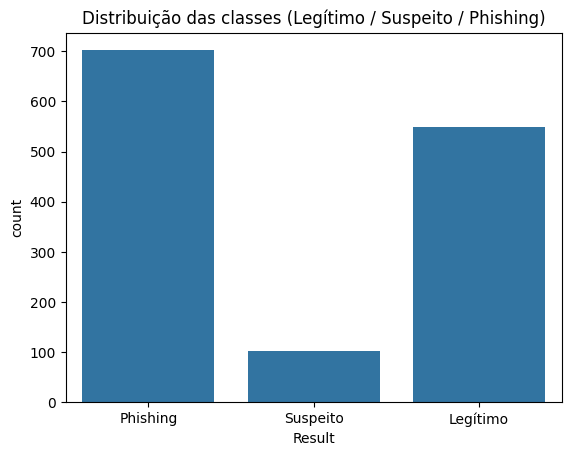

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result', data=df)
plt.title('Distribuição das classes (Legítimo / Suspeito / Phishing)')
plt.xticks(ticks=[0, 1, 2], labels=['Phishing', 'Suspeito', 'Legítimo'])
plt.show()
